# Visual exploratory data analysis

You'll be working with a dataset of traffic stops by police officers that was collected by the Stanford Open Policing Project. 

You'll be focusing on data from the state of Rhode Island.

In [1]:
import pandas as pd
ri = pd.read_csv('/work/data_science_notes/ 23. Analyzing police activity with pandas/data/police_edited.csv')
ri['stop_datetime'] = pd.to_datetime(ri.stop_datetime)
ri.set_index(ri.stop_datetime, inplace=True)
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Does time of day affect arrest rate?

### Calculating the hourly arrest rate

In [2]:
# Take the mean of the is_arrested column to calculate the overall arrest rate
ri.is_arrested.mean()

0.0355690117407784

In [3]:
# Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate
# Save the hourly arrest rate Series as a new object, hourly_arrest_rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

# ERROR! The .dt accesor isn't needed when you are working with a DatetimeIndex 

### Plotting the hourly arrest rate

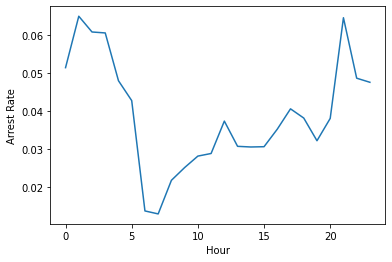

In [4]:
# Create a line plot of hourly_arrest_rate using the .plot() method
# Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'

import matplotlib.pyplot as plt

hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.show()

## Are drug-related stops on the rise?

### Plotting drug-related stops

In [5]:
# Calculate the annual rate of drug-related stops by resampling the drugs_related_stop column (on the 'A' frequency) and taking the mean
# Save the annual drug rate Series as a new object, annual_drug_rate
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# ERROR! What's resampling? How it works? 

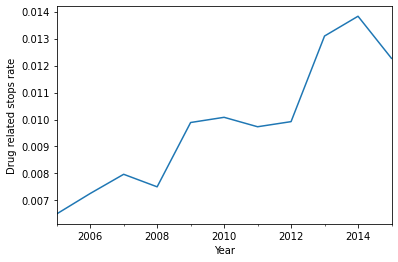

In [6]:
# Create a line plot of annual_drug_rate using the .plot() method
annual_drug_rate.plot()
plt.xlabel('Year')
plt.ylabel('Drug related stops rate')
plt.show()

### Comparing drug and search rates

In [7]:
# Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate
annual_search_rate = ri.search_conducted.resample('A').mean()

In [8]:
# Concatenate annual_drug_rate and annual_search_rate along the columns axis, and save the result as annual
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# ERROR! Rember the pd.concat() method to concatenate pandas Series

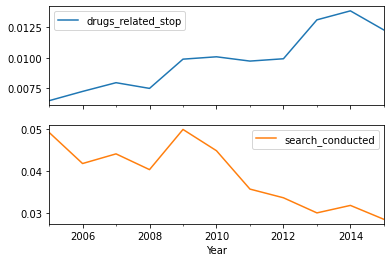

In [9]:
annual.plot(subplots=True)
plt.xlabel('Year')
plt.show()

## What violations are caught in each district?

### Tallying violations by district

In [11]:
# Create a frequency table from the ri DataFrame's district and violation columns using the pd.crosstab() function
# Save the frequency table as a new object, all_zones
all_zones = pd.crosstab(ri['district'], ri['violation'])
all_zones

# ERROR! Remember how to create a crosstab

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [12]:
# Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor
# Save the smaller table as a new object, k_zones
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


### Plotting violations by district

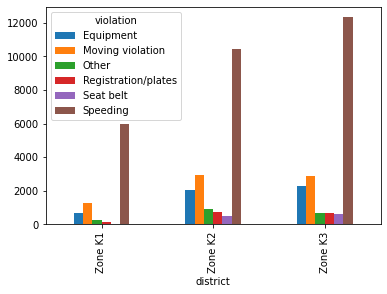

In [18]:
# Create a bar plot of k_zones
k_zones.plot(kind='bar')
plt.show()

# ERROR! Remember how to create a plot from a pandas data structure 

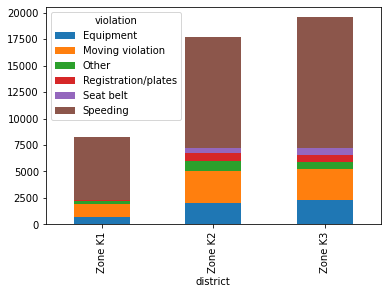

In [17]:
# Create a stacked bar plot of k_zones
k_zones.plot(kind='bar', stacked=True)
plt.show()

## How long might you be stopped for a violation?

### Converting stop durations to numbers

In [25]:
# Print the unique values in the stop_duration column
ri.stop_duration.value_counts()

0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64

In [22]:
# Create a dictionary called mapping that maps the stop_duration strings to the specified integers: [8, 23, 45]
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [23]:
# Convert the stop_duration strings to integers using the mapping, and store the results in a new column called stop_minutes
ri['stop_minutes'] = ri['stop_duration'].map(mapping)

In [26]:
# Print the unique values in the stop_minutes column, to verify that the durations were properly converted to integers
ri.stop_minutes.value_counts()

8     69577
23    13740
45     3219
Name: stop_minutes, dtype: int64

### Plotting stop length

In [28]:
# For each value in the ri DataFrame's violation_raw column, calculate the mean number of stop_minutes that a driver is detained
# Save the resulting Series as a new object, stop_length
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

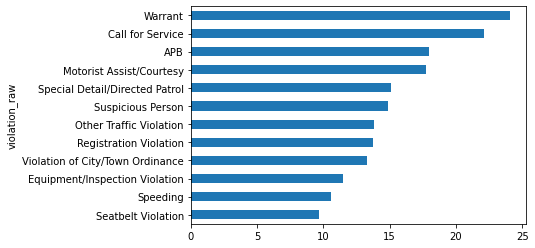

In [29]:
# Sort stop_length by its values, and then visualize it using a horizontal bar plot
# Display the plot
stop_length = stop_length.sort_values()
stop_length.plot(kind='barh')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc001eea-22fe-4a27-852d-7fbece520334' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>